# Checking ouliers effect on Linear Regresion Model

In this section we will study effect of outliers in different magnitude and proportion in a linear regression model. First we shoul import some libraries.

In [1]:
from numpy import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from numpy import random
import pandas as pd
import sklearn.preprocessing as pre
from sklearn.datasets import make_regression
import seaborn as sns
from scipy import stats
from sklearn import metrics

Running model with different magnitude and proportion to see how it can affect the following parameters:
- Model's Score
- Coefs variant
- Coefs Mean
- Model's Loss
- Mean Absolute Error of the true value and predicted value
- Mean Absolute Percentage Error of the true value and predicted value
- Mean Squared Error of the true value and predicted value
- R2 of the true value and predicted value

In [2]:
# fixing the random state for our work to get repetetive results

np.random.seed(42)


# a list of different magnitude and proportion for outliers
outliers_proportion = np.linspace(0.001,0.03,10)
outliers_magnitude  = np.linspace(2,60,10)

n_samples = 1000



M = LinearRegression()

# parameters that we want to investigate
# score_list_e = np.zeros(len(outliers_proportion) * len(outliers_magnitude)).reshape(10,10)
# score_list   = np.zeros(len(outliers_proportion) * len(outliers_magnitude)).reshape(10,10)
coefs_var    = np.zeros(len(outliers_proportion) * len(outliers_magnitude)).reshape(10,10)
coefs_mean   = np.zeros(len(outliers_proportion) * len(outliers_magnitude)).reshape(10,10)
loss         = np.zeros(len(outliers_proportion) * len(outliers_magnitude)).reshape(10,10)
mae_list     = np.zeros(len(outliers_proportion) * len(outliers_magnitude)).reshape(10,10)
mape_list    = np.zeros(len(outliers_proportion) * len(outliers_magnitude)).reshape(10,10)
r2_list      = np.zeros(len(outliers_proportion) * len(outliers_magnitude)).reshape(10,10)
mse_list     = np.zeros(len(outliers_proportion) * len(outliers_magnitude)).reshape(10,10)


# iteration over all possible combination of magnitude and proportion

i = 0
for magn in outliers_magnitude:
    # creating a data
    Data = make_regression(n_samples= 1000, n_features=10, n_informative=10, noise=5, random_state=42)
    
    j = 0
    for prop in outliers_proportion:
        X = Data[0]
        y = Data[1].reshape(-1,1)
        n_outliers = int(prop * n_samples)

        outliers_index = random.choice(n_samples, n_outliers, replace=False)
        X[outliers_index] = X[outliers_index] * magn

        X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

        M.fit(X_train, y_train)
        
        scr = M.score(X_val, y_val)
        y_pred = M.predict(X_test)
        
        mae_list[i][j]  = np.around(metrics.mean_absolute_error(y_test,y_pred), decimals=3)
        mape_list[i][j] = np.around(metrics.mean_absolute_percentage_error(y_test,y_pred), decimals=3)
        r2_list[i][j]   = np.around(metrics.r2_score(y_test,y_pred), decimals=3)
        mse_list[i][j]  = np.around(metrics.mean_squared_error(y_test,y_pred), decimals=3)
        
        coefs_var[i][j]  = np.around(np.var(M.coef_), decimals=3)
        coefs_mean[i][j] = np.around(np.mean(M.coef_), decimals=3)
        
        loss[i][j] = np.around(np.e**(1-scr), decimals=3)
        
        
        
#         print('Number of outliers:{}, Magnitude of outliers:{} is   '.format(prop,magn),M.score(X_test, y_test))
        j += 1
    i += 1

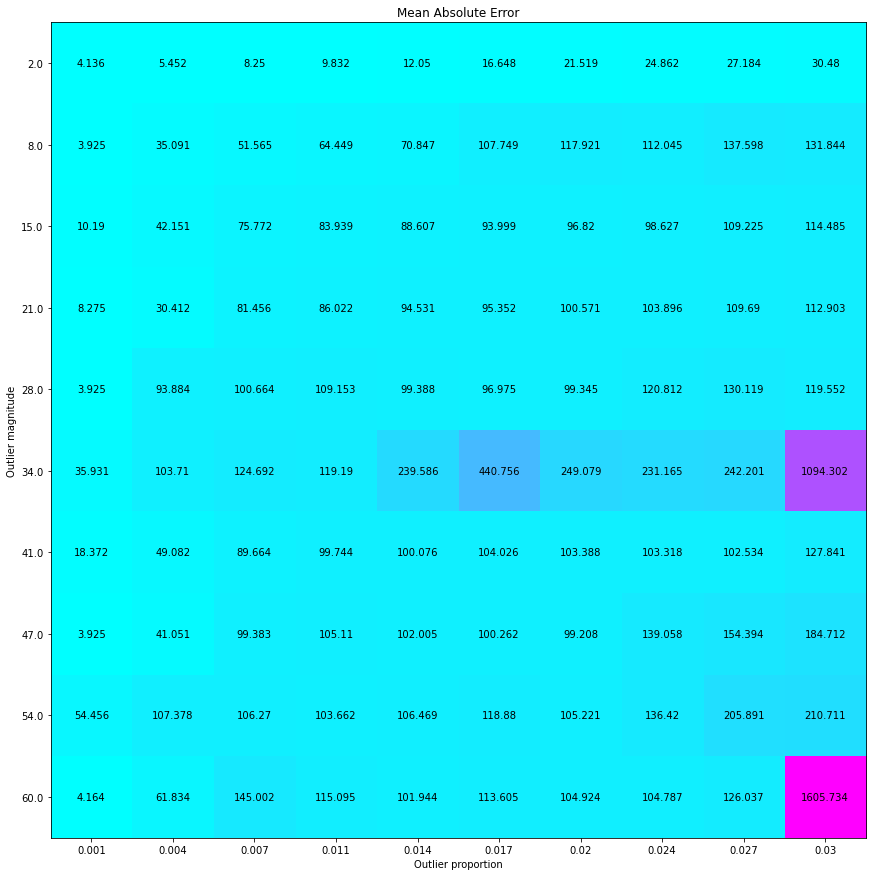

In [3]:
# Effect of outliers on model's MAE

fig, ax = plt.subplots()

fig.set_figheight(15)
fig.set_figwidth(15)
ax.imshow(mae_list, cmap=plt.cm.cool,)
ax.set_title('Mean Absolute Error')

for (i, j), z in np.ndenumerate(mae_list):
    ax.text(j, i, '{}'.format(z), ha='center', va='center')

ax.set_xlabel('Outlier proportion')
ax.set_ylabel('Outlier magnitude')
ax.set_yticks([0,1,2,3,4,5,6,7,8,9])
ax.set_yticklabels(np.around(outliers_magnitude,decimals=0))
ax.set_xticks([0,1,2,3,4,5,6,7,8,9])
ax.set_xticklabels(np.around(outliers_proportion,decimals=3))
plt.show()


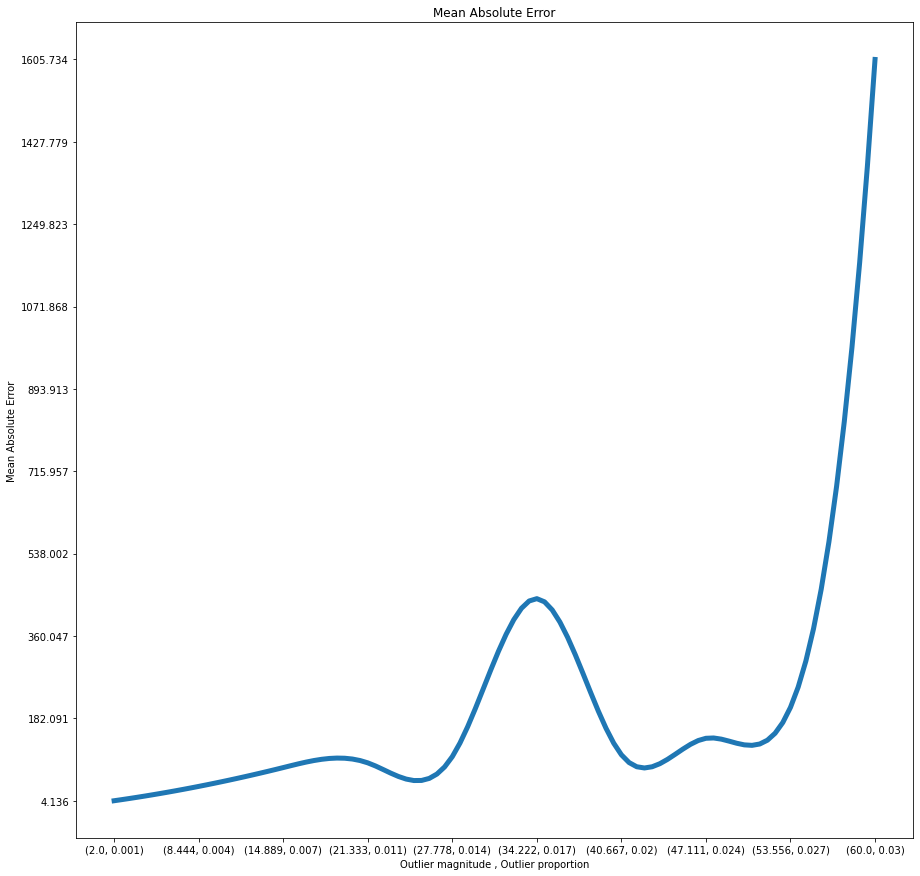

In [4]:
from scipy import interpolate

# Effect of outliers on model's MAE

x = np.arange(10)
mae = mae_list[(0,1,2,3,4,5,6,7,8,9),(0,1,2,3,4,5,6,7,8,9)]
xtick = list(zip(np.around(outliers_magnitude,decimals=3),np.around(outliers_proportion,decimals=3)))
ytick = np.linspace(min(mae),max(mae),10)

tck = interpolate.splrep(x,mae)
x_new = np.linspace(0,9,100)
mae_new = interpolate.splev(x_new, tck)


fig, ax = plt.subplots()
fig.set_figheight(15)
fig.set_figwidth(15)
ax.set_title('Mean Absolute Error')

ax.plot(x_new,mae_new, linewidth=5)

ax.set_xlabel('Outlier magnitude , Outlier proportion')
ax.set_ylabel('Mean Absolute Error')
ax.set_yticks(ytick)
ax.set_yticklabels(np.around(ytick,decimals=3))
ax.set_xticks([0,1,2,3,4,5,6,7,8,9])
ax.set_xticklabels(xtick)
plt.show()


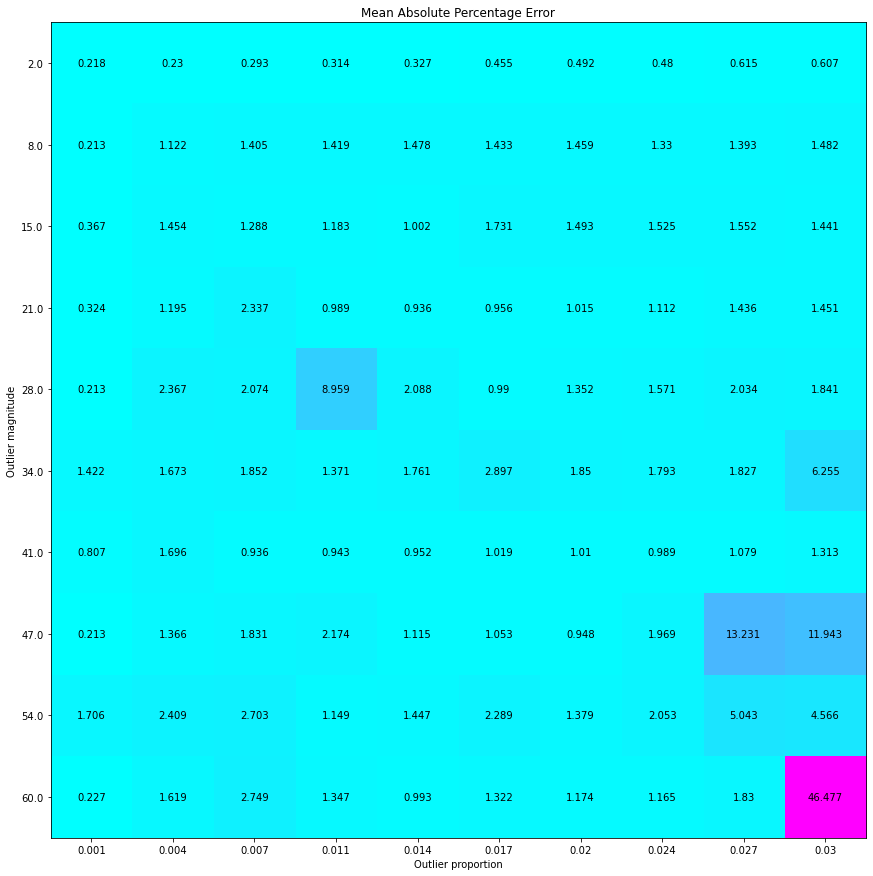

In [5]:
# Effect of outliers on model's MAPE

fig, ax = plt.subplots()

fig.set_figheight(15)
fig.set_figwidth(15)
ax.imshow(mape_list, cmap=plt.cm.cool,)
ax.set_title('Mean Absolute Percentage Error')

for (i, j), z in np.ndenumerate(mape_list):
    ax.text(j, i, '{}'.format(z), ha='center', va='center')

ax.set_xlabel('Outlier proportion')
ax.set_ylabel('Outlier magnitude')
ax.set_yticks([0,1,2,3,4,5,6,7,8,9])
ax.set_yticklabels(np.around(outliers_magnitude,decimals=0))
ax.set_xticks([0,1,2,3,4,5,6,7,8,9])
ax.set_xticklabels(np.around(outliers_proportion,decimals=3))
plt.show()


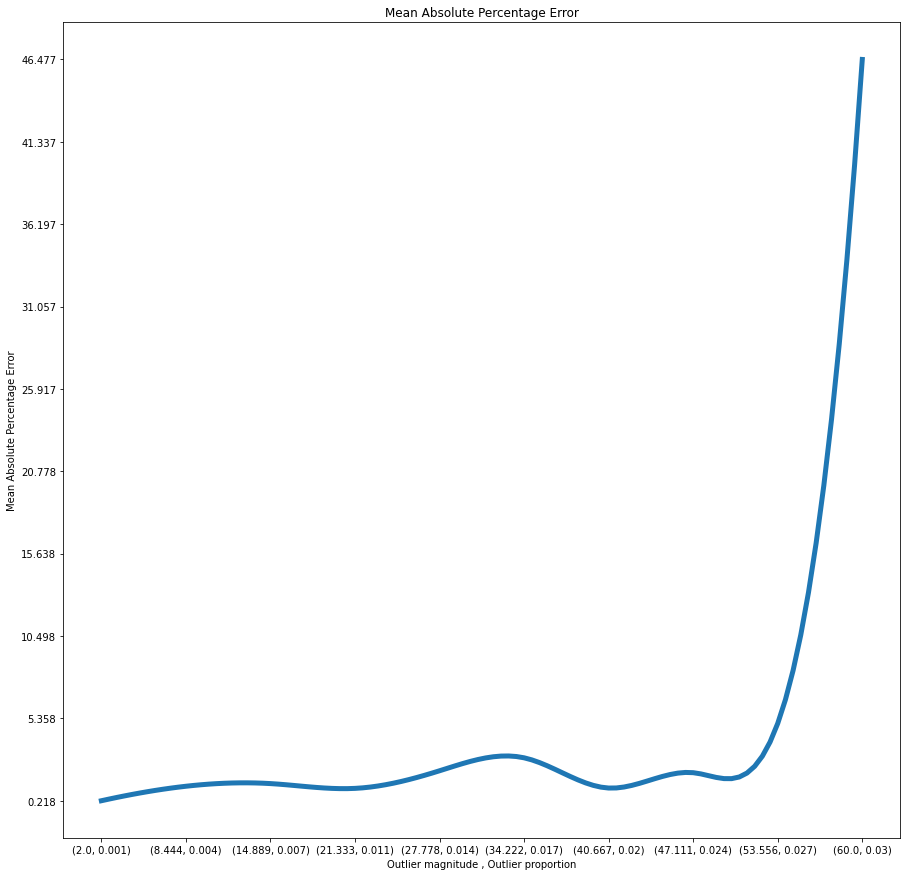

In [6]:
from scipy import interpolate

# Effect of outliers on model's MAPE

x = np.arange(10)
mape = mape_list[(0,1,2,3,4,5,6,7,8,9),(0,1,2,3,4,5,6,7,8,9)]
xtick = list(zip(np.around(outliers_magnitude,decimals=3),np.around(outliers_proportion,decimals=3)))
ytick = np.linspace(min(mape),max(mape),10)

tck = interpolate.splrep(x,mape)
x_new = np.linspace(0,9,100)
mape_new = interpolate.splev(x_new, tck)


fig, ax = plt.subplots()
fig.set_figheight(15)
fig.set_figwidth(15)
ax.set_title('Mean Absolute Percentage Error')

ax.plot(x_new,mape_new, linewidth=5)

ax.set_xlabel('Outlier magnitude , Outlier proportion')
ax.set_ylabel('Mean Absolute Percentage Error')
ax.set_yticks(ytick)
ax.set_yticklabels(np.around(ytick,decimals=3))
ax.set_xticks([0,1,2,3,4,5,6,7,8,9])
ax.set_xticklabels(xtick)
plt.show()


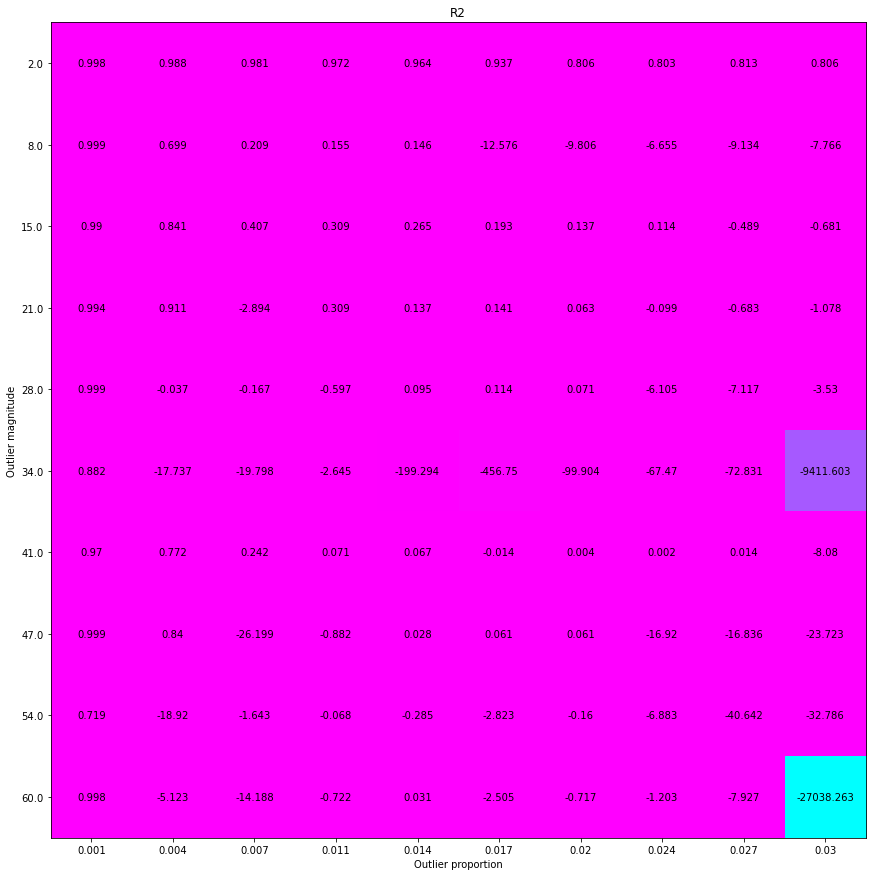

In [7]:
# Effect of outliers on model's R2

fig, ax = plt.subplots()

fig.set_figheight(15)
fig.set_figwidth(15)
ax.imshow(r2_list, cmap=plt.cm.cool,)
ax.set_title('R2')

for (i, j), z in np.ndenumerate(r2_list):
    ax.text(j, i, '{}'.format(z), ha='center', va='center')

ax.set_xlabel('Outlier proportion')
ax.set_ylabel('Outlier magnitude')
ax.set_yticks([0,1,2,3,4,5,6,7,8,9])
ax.set_yticklabels(np.around(outliers_magnitude,decimals=0))
ax.set_xticks([0,1,2,3,4,5,6,7,8,9])
ax.set_xticklabels(np.around(outliers_proportion,decimals=3))
plt.show()


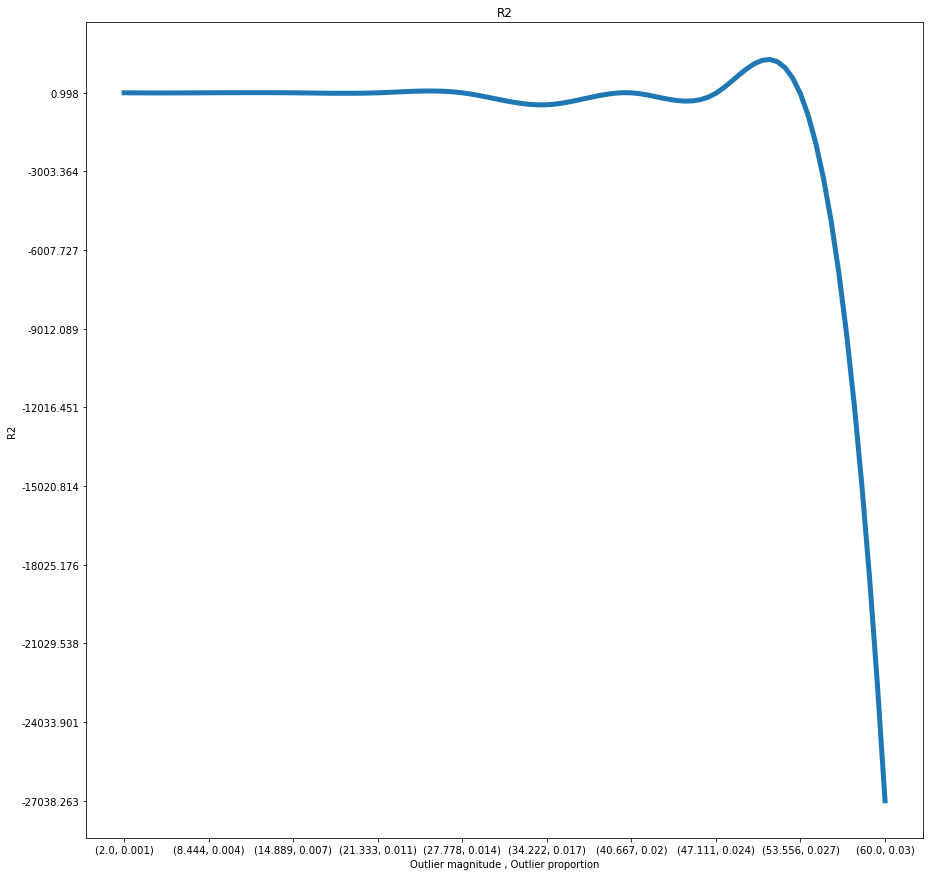

In [8]:
from scipy import interpolate

# Effect of outliers on model's R2

x = np.arange(10)
r2 = r2_list[(0,1,2,3,4,5,6,7,8,9),(0,1,2,3,4,5,6,7,8,9)]
xtick = list(zip(np.around(outliers_magnitude,decimals=3),np.around(outliers_proportion,decimals=3)))
ytick = np.linspace(min(r2),max(r2),10)

tck = interpolate.splrep(x,r2)
x_new = np.linspace(0,9,100)
r2_new = interpolate.splev(x_new, tck)


fig, ax = plt.subplots()
fig.set_figheight(15)
fig.set_figwidth(15)
ax.set_title('R2')

ax.plot(x_new,r2_new, linewidth=5)

ax.set_xlabel('Outlier magnitude , Outlier proportion')
ax.set_ylabel('R2')
ax.set_yticks(ytick)
ax.set_yticklabels(np.around(ytick,decimals=3))
ax.set_xticks([0,1,2,3,4,5,6,7,8,9])
ax.set_xticklabels(xtick)
plt.show()


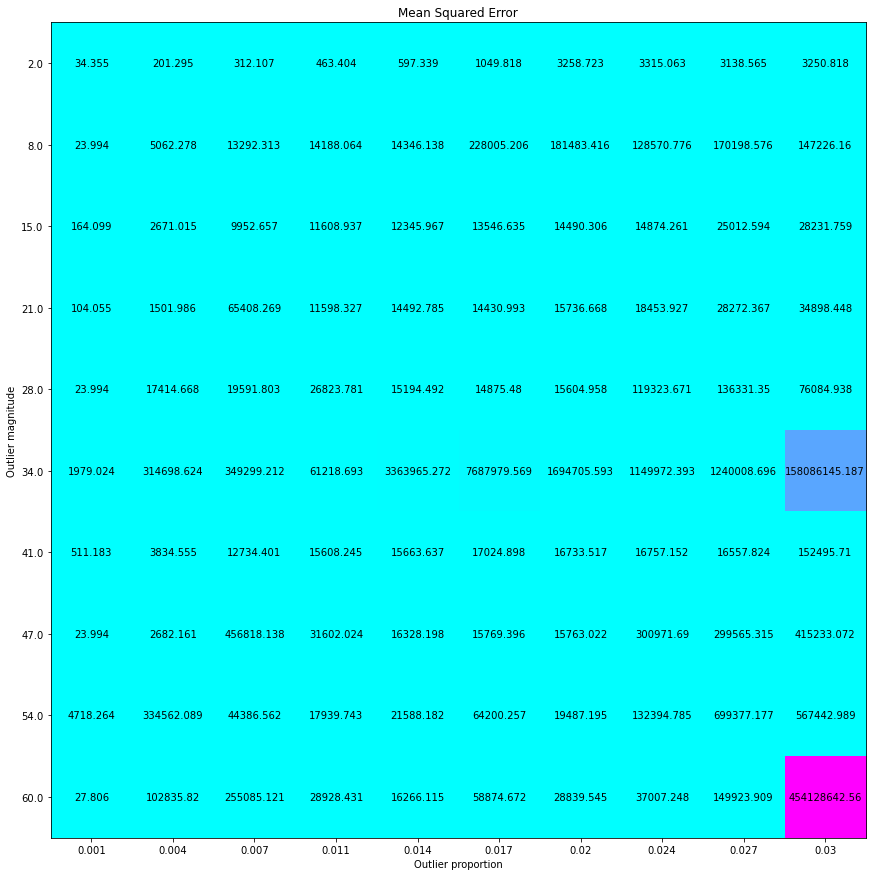

In [9]:
# Effect of outliers on model's MSE

fig, ax = plt.subplots()

fig.set_figheight(15)
fig.set_figwidth(15)
ax.imshow(mse_list, cmap=plt.cm.cool,)
ax.set_title('Mean Squared Error')

for (i, j), z in np.ndenumerate(mse_list):
    ax.text(j, i, '{}'.format(z), ha='center', va='center')

ax.set_xlabel('Outlier proportion')
ax.set_ylabel('Outlier magnitude')
ax.set_yticks([0,1,2,3,4,5,6,7,8,9])
ax.set_yticklabels(np.around(outliers_magnitude,decimals=0))
ax.set_xticks([0,1,2,3,4,5,6,7,8,9])
ax.set_xticklabels(np.around(outliers_proportion,decimals=3))
plt.show()


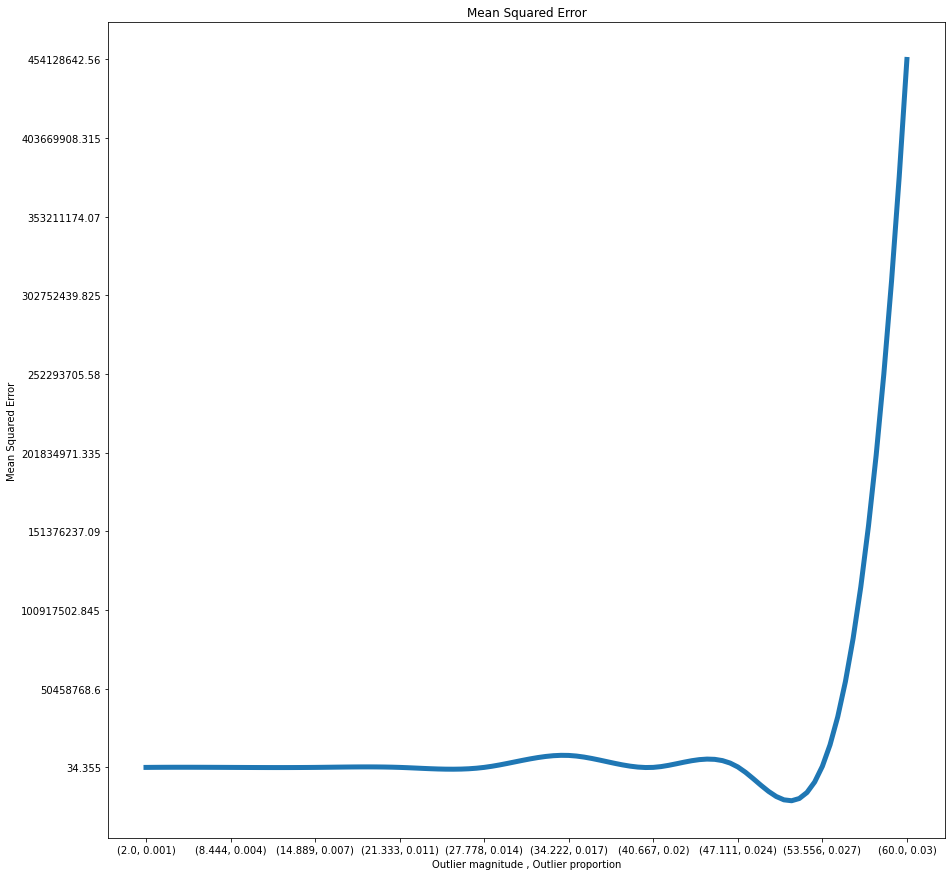

In [10]:
from scipy import interpolate

# Effect of outliers on model's MSE

x = np.arange(10)
mse = mse_list[(0,1,2,3,4,5,6,7,8,9),(0,1,2,3,4,5,6,7,8,9)]
xtick = list(zip(np.around(outliers_magnitude,decimals=3),np.around(outliers_proportion,decimals=3)))
ytick = np.linspace(min(mse),max(mse),10)

tck = interpolate.splrep(x,mse)
x_new = np.linspace(0,9,100)
mse_new = interpolate.splev(x_new, tck)


fig, ax = plt.subplots()
fig.set_figheight(15)
fig.set_figwidth(15)
ax.set_title('Mean Squared Error')

ax.plot(x_new,mse_new, linewidth=5)

ax.set_xlabel('Outlier magnitude , Outlier proportion')
ax.set_ylabel('Mean Squared Error')
ax.set_yticks(ytick)
ax.set_yticklabels(np.around(ytick,decimals=3))
ax.set_xticks([0,1,2,3,4,5,6,7,8,9])
ax.set_xticklabels(xtick)
plt.show()


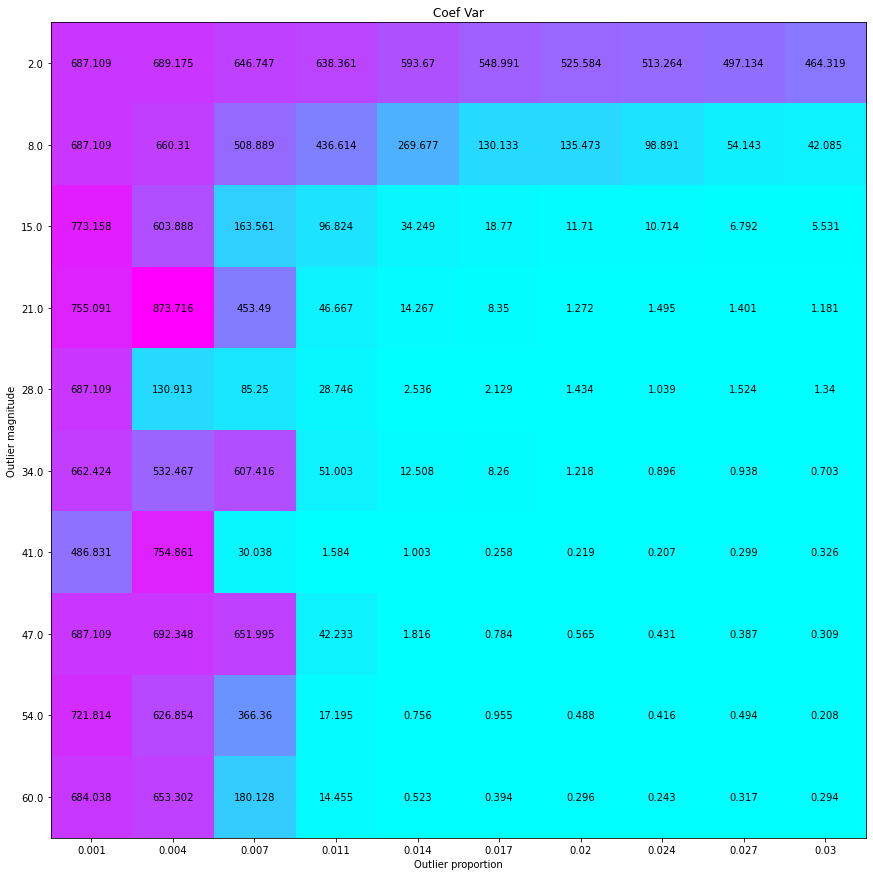

In [11]:
# Effect of outliers on coef's variance

fig, ax = plt.subplots()

fig.set_figheight(15)
fig.set_figwidth(15)
ax.imshow(coefs_var, cmap=plt.cm.cool,)
ax.set_title('Coef Var')

for (i, j), z in np.ndenumerate(coefs_var):
    ax.text(j, i, '{}'.format(z), ha='center', va='center')

ax.set_xlabel('Outlier proportion')
ax.set_ylabel('Outlier magnitude')
ax.set_yticks([0,1,2,3,4,5,6,7,8,9])
ax.set_yticklabels(np.around(outliers_magnitude,decimals=0))
ax.set_xticks([0,1,2,3,4,5,6,7,8,9])
ax.set_xticklabels(np.around(outliers_proportion,decimals=3))
plt.show()

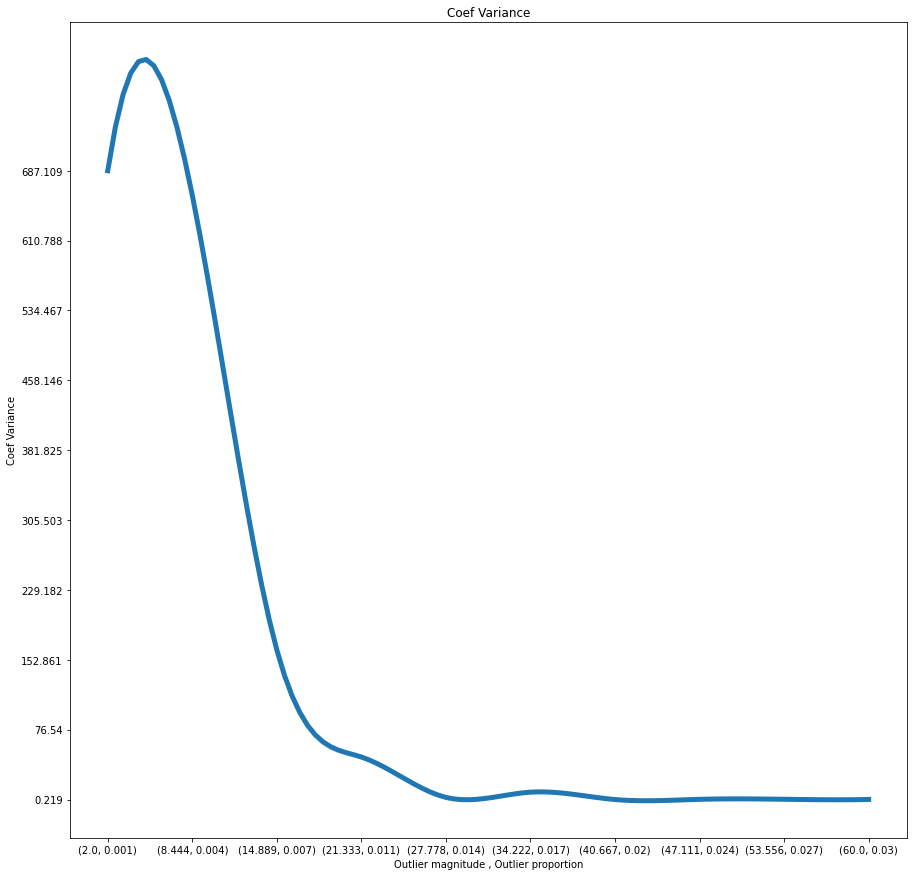

In [12]:
from scipy import interpolate

# Effect of outliers on coef's variance

x = np.arange(10)
var = coefs_var[(0,1,2,3,4,5,6,7,8,9),(0,1,2,3,4,5,6,7,8,9)]
xtick = list(zip(np.around(outliers_magnitude,decimals=3),np.around(outliers_proportion,decimals=3)))
ytick = np.linspace(min(var),max(var),10)

tck = interpolate.splrep(x,var)
x_new = np.linspace(0,9,100)
var_new = interpolate.splev(x_new, tck)


fig, ax = plt.subplots()
fig.set_figheight(15)
fig.set_figwidth(15)
ax.set_title('Coef Variance')

ax.plot(x_new,var_new, linewidth=5)

ax.set_xlabel('Outlier magnitude , Outlier proportion')
ax.set_ylabel('Coef Variance')
ax.set_yticks(ytick)
ax.set_yticklabels(np.around(ytick,decimals=3))
ax.set_xticks([0,1,2,3,4,5,6,7,8,9])
ax.set_xticklabels(xtick)
plt.show()


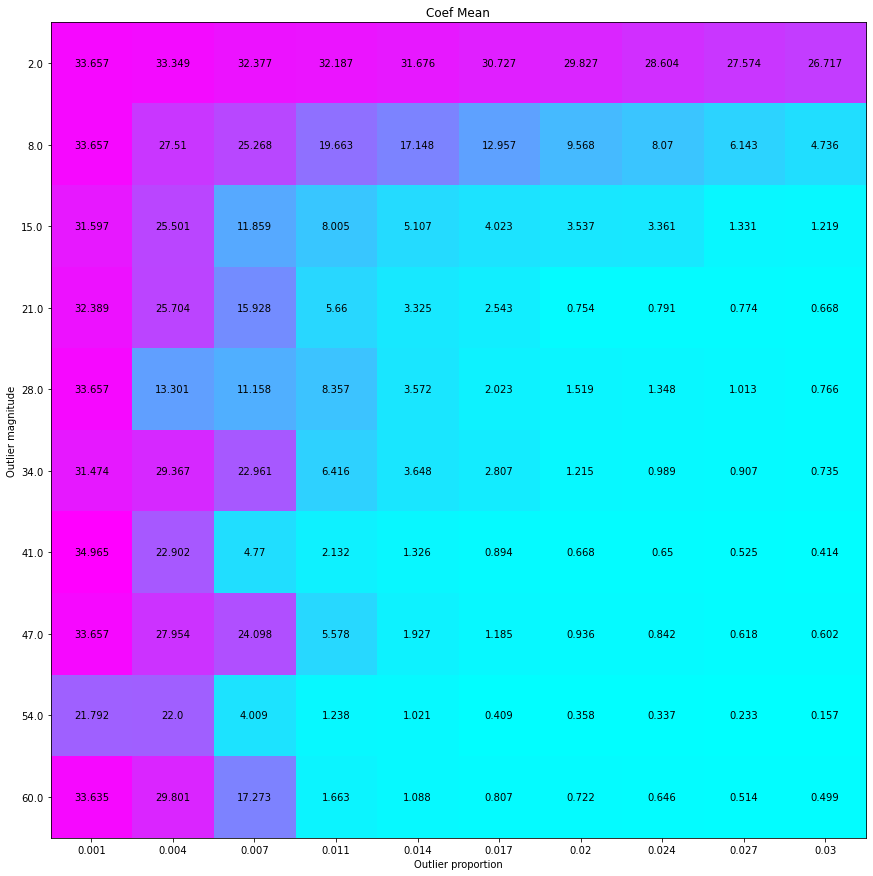

In [13]:
# Effect of outliers on coef's mean

fig, ax = plt.subplots()

fig.set_figheight(15)
fig.set_figwidth(15)
ax.imshow(coefs_mean, cmap=plt.cm.cool,)
ax.set_title('Coef Mean')

for (i, j), z in np.ndenumerate(coefs_mean):
    ax.text(j, i, '{}'.format(z), ha='center', va='center')

ax.set_xlabel('Outlier proportion')
ax.set_ylabel('Outlier magnitude')
ax.set_yticks([0,1,2,3,4,5,6,7,8,9])
ax.set_yticklabels(np.around(outliers_magnitude,decimals=0))
ax.set_xticks([0,1,2,3,4,5,6,7,8,9])
ax.set_xticklabels(np.around(outliers_proportion,decimals=3))
plt.show()

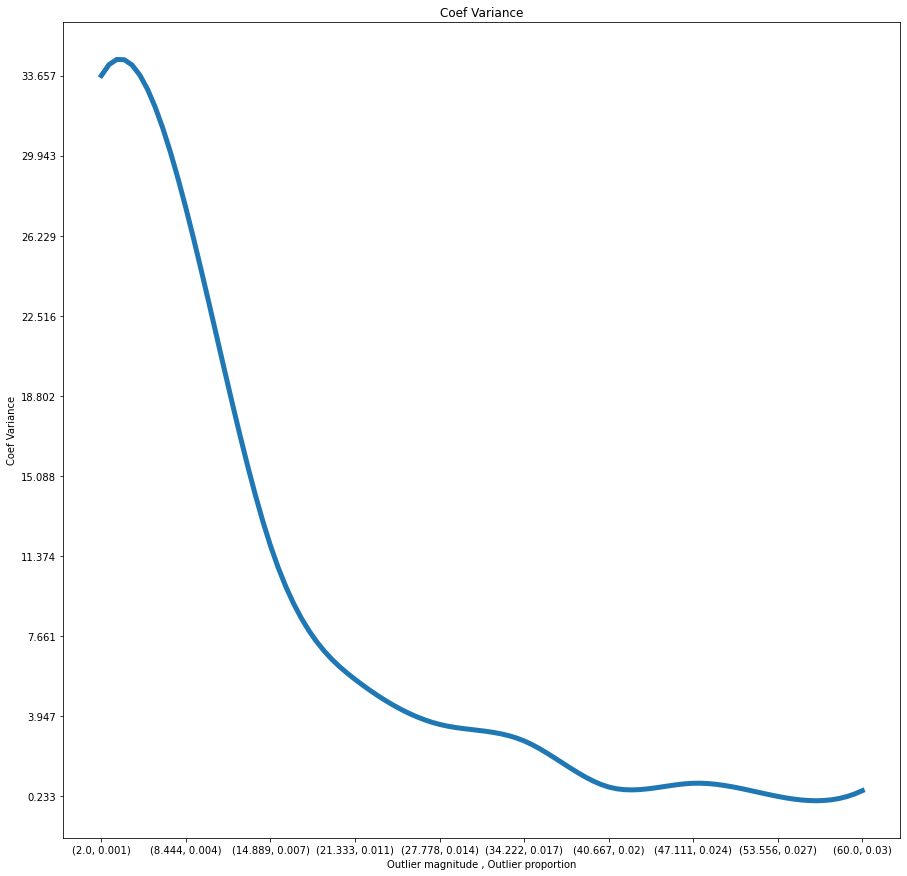

In [14]:
from scipy import interpolate

# Effect of outliers on coef's Mean
x = np.arange(10)
mean = coefs_mean[(0,1,2,3,4,5,6,7,8,9),(0,1,2,3,4,5,6,7,8,9)]
xtick = list(zip(np.around(outliers_magnitude,decimals=3),np.around(outliers_proportion,decimals=3)))
ytick = np.linspace(min(mean),max(mean),10)

tck = interpolate.splrep(x,mean)
x_new = np.linspace(0,9,100)
mean_new = interpolate.splev(x_new, tck)


fig, ax = plt.subplots()
fig.set_figheight(15)
fig.set_figwidth(15)
ax.set_title('Coef Variance')

ax.plot(x_new,mean_new, linewidth=5)

ax.set_xlabel('Outlier magnitude , Outlier proportion')
ax.set_ylabel('Coef Variance')
ax.set_yticks(ytick)
ax.set_yticklabels(np.around(ytick,decimals=3))
ax.set_xticks([0,1,2,3,4,5,6,7,8,9])
ax.set_xticklabels(xtick)
plt.show()


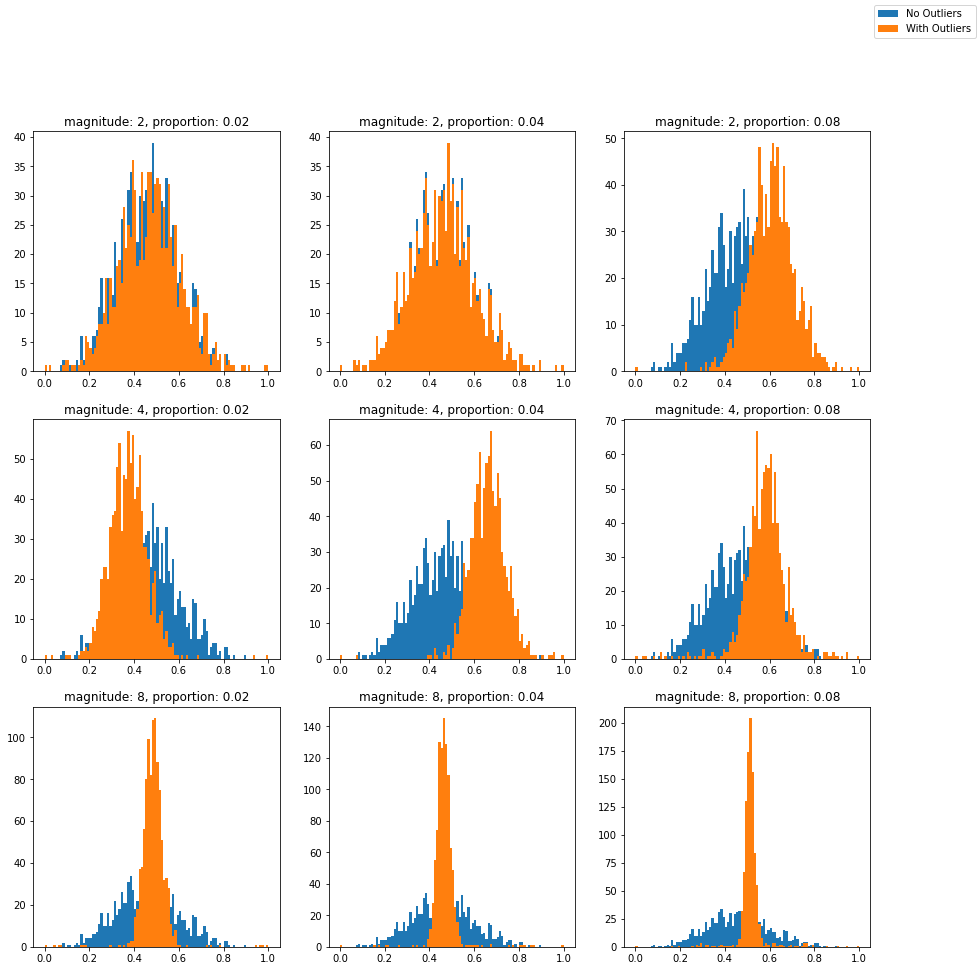

In [15]:
# Analyzing the effect of outliers on normalization in a linear regression model

np.random.seed(42)

outliers_proportion = [0.02,0.04,0.08]
outliers_magnitude  = [2,4,8]

n_samples = 1000

fig, axes = plt.subplots(3, 3)
fig.set_figheight(15)
fig.set_figwidth(15)

i = 0

for magn in outliers_magnitude:
    j = 0
    for prop in outliers_proportion:
        Data = make_regression(n_samples= 1000, n_features=1, n_informative=1, noise=5, random_state=42)
        X = Data[0]
        y = Data[1].reshape(-1,1)
        S = pre.MinMaxScaler()
        transformed1 = S.fit_transform(X)
        axes[i][j].hist(transformed1,bins = 100)

        Data = make_regression(n_samples= 1000, n_features=1, n_informative=1, noise=5, random_state=42)
        X = Data[0]
        y = Data[1].reshape(-1,1)
        n_outliers = int(prop * n_samples)   
        outliers_index = random.choice(n_samples, n_outliers, replace=False, )
        X[outliers_index] = X[outliers_index] * magn
        S1 = pre.MinMaxScaler()
        transformed = S1.fit_transform(X)
        axes[i][j].hist(transformed,bins = 100)
        axes[i][j].set_title('magnitude: {}, proportion: {}'.format(magn,prop))
        
        j += 1
    i += 1
fig.legend(['No Outliers','With Outliers'])

# Normalization effect on Linear Regresion Model

In this section we will try different type of normalization and their effect on model's performance. First we would create data with covariants that have different type of distributions.

In [16]:
# Creating covariates with different probability distribution

Models = {}

np.random.seed(42)

noise = (random.normal(loc = 0, scale = 1, size = 1000).reshape(-1,1))* 10
approx_coefs = np.array([0.43,-47.4,13,-1.2]).reshape(-1,1)


c1 = random.normal(loc = 0, scale = 5, size = 1000).reshape(-1,1) + 250
c2 = random.gamma(shape = 10, scale = 10, size = 1000).reshape(-1,1) -30
c3 = random.uniform(low = 0,high = 100, size = 1000).reshape(-1,1) +120
c4 = random.binomial(n = 400, p = 0.9 ,size = 1000).reshape(-1,1)

print('approx coefs:\n', approx_coefs)

X = np.hstack((c1,c2,c3,c4))
y = np.dot(X , approx_coefs) + noise


data = pd.DataFrame(data = np.hstack((X,y)))
data.columns = ['c1','c2','c3','c4','y']
data

approx coefs:
 [[  0.43]
 [-47.4 ]
 [ 13.  ]
 [ -1.2 ]]


,c1,c2,c3,c4,y
0,256.996777,47.157408,210.920214,363.0,186.577383
1,254.623168,62.242658,201.962487,348.0,-634.284333
2,250.298152,18.935524,208.819135,372.0,1484.810023
3,246.765316,73.451041,139.921969,359.0,-1972.054358
4,253.491117,88.646261,148.418430,359.0,-2596.533520
...,...,...,...,...,...
995,255.350751,113.112706,218.617680,360.0,-2844.522595
996,249.867394,86.060595,202.084901,359.0,-1757.548636
997,245.590627,54.402795,148.147730,371.0,-985.959569
998,249.184665,66.911879,127.006870,353.0,-1842.696126


In [17]:
data.describe()

,c1,c2,c3,c4,y
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,250.354181,70.509171,169.729924,359.81900,-1459.582862
std,4.987272,32.297196,28.937999,6.06259,1566.606911
min,235.298057,-0.101774,120.094342,339.00000,-9677.577393
25%,246.968792,47.307622,145.228528,356.00000,-2365.025675
50%,250.315386,67.730444,168.367915,360.00000,-1318.530288
75%,253.644411,88.694912,194.275375,364.00000,-341.707540
max,265.965538,247.332706,219.935030,375.00000,2366.309125


As we can see each covariate has different values of mean and var (because of its distribution and also the ratio implemented in the creation step). The foolowing code illustartes the distribution of covariates:


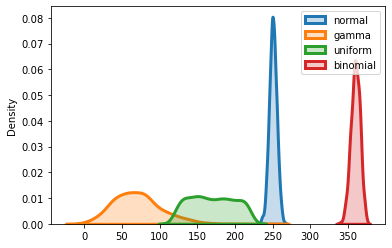

In [18]:
import warnings
warnings.filterwarnings('ignore')

sns.distplot(c1, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},)
sns.distplot([c2], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},)
sns.distplot([c3], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},)
sns.distplot([c4], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},)


plt.legend(['normal','gamma','uniform','binomial','beta'])

Next we would test linear regression model without any normalization:

Model Coefs:  [[  0.42137102 -47.40081531  13.01507983  -1.25661576]]
Real Coefs:  [[  0.43 -47.4   13.    -1.2 ]]
------------
MAE:  7.916193574778013
MAPE:  0.03053517611144607
R2:  0.9999579676717917
MSE:  98.39398633399244


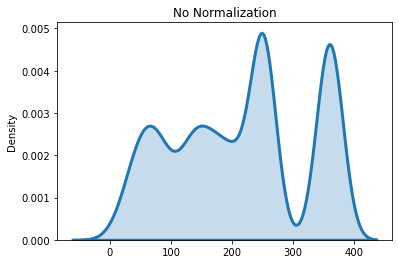

In [19]:
np.random.seed(42)

X = np.hstack((c1,c2,c3,c4)) 
y = np.dot(X , approx_coefs) + noise + 7 
X
sns.distplot(X, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},)
plt.title('No Normalization')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

Model = LinearRegression()
Model.fit(X_train,y_train)

print('Model Coefs: ',Model.coef_)
print('Real Coefs: ',approx_coefs.reshape(1,-1))
print('------------')
y_pred = Model.predict(X_test)
print('MAE: ',metrics.mean_absolute_error(y_test,y_pred))
print('MAPE: ',metrics.mean_absolute_percentage_error(y_test,y_pred))
print('R2: ',metrics.r2_score(y_test,y_pred))
print('MSE: ',metrics.mean_squared_error(y_test,y_pred))

Model Coefs:  [[    2.07367687 -1530.14375401   376.32583887    -7.66136615]]
Real Coefs:  [[  0.43 -47.4   13.    -1.2 ]]
------------
MAE:  7.891388566683397
MAPE:  0.021480538275162345
R2:  0.9999578027446001
MSE:  97.44192408560689


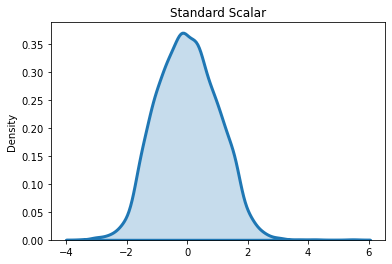

In [20]:
np.random.seed(42)

X = np.hstack((c1,c2,c3,c4))
y = np.dot(X , approx_coefs) + noise + 7
S = pre.StandardScaler()
X_new = S.fit_transform(X)

sns.distplot(X_new, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},)
plt.title('Standard Scalar')
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.4, random_state=42)

Model = LinearRegression()
Model.fit(X_train,y_train)

print('Model Coefs: ',Model.coef_)
print('Real Coefs: ',approx_coefs.reshape(1,-1))
print('------------')
y_pred = Model.predict(X_test)
print('MAE: ',metrics.mean_absolute_error(y_test,y_pred))
print('MAPE: ',metrics.mean_absolute_percentage_error(y_test,y_pred))
print('R2: ',metrics.r2_score(y_test,y_pred))
print('MSE: ',metrics.mean_squared_error(y_test,y_pred))


Model Coefs:  [[    12.75772979 -11728.56517238   1299.0335447     -45.51638864]]
Real Coefs:  [[  0.43 -47.4   13.    -1.2 ]]
------------
MAE:  7.891388566683398
MAPE:  0.027729283214669227
R2:  0.9999578027446001
MSE:  97.44192408560404


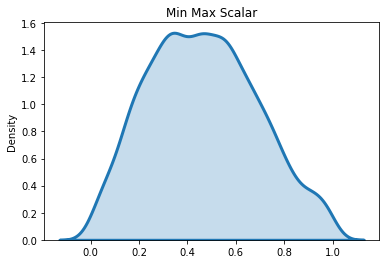

In [22]:
np.random.seed(42)

X = np.hstack((c1,c2,c3,c4))
y = np.dot(X , approx_coefs) + noise 
S = pre.MinMaxScaler()
X_new = S.fit_transform(X)

sns.distplot(X_new, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},)
plt.title('Min Max Scalar')
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.4, random_state=42)

Model = LinearRegression()
Model.fit(X_train,y_train)

print('Model Coefs: ',Model.coef_)
print('Real Coefs: ',approx_coefs.reshape(1,-1))
print('------------')
y_pred = Model.predict(X_test)
print('MAE: ',metrics.mean_absolute_error(y_test,y_pred))
print('MAPE: ',metrics.mean_absolute_percentage_error(y_test,y_pred))
print('R2: ',metrics.r2_score(y_test,y_pred))
print('MSE: ',metrics.mean_squared_error(y_test,y_pred))


Model Coefs:  [[    2.7770702  -1961.78609888   638.15164667   -10.11475303]]
Real Coefs:  [[  0.43 -47.4   13.    -1.2 ]]
------------
MAE:  7.891388566683337
MAPE:  0.027729283214668356
R2:  0.9999578027446001
MSE:  97.44192408560511


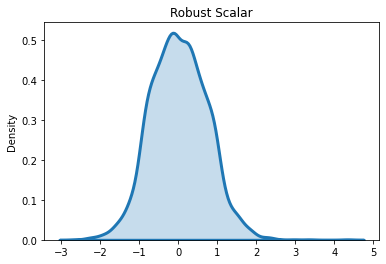

In [23]:
np.random.seed(42)

X = np.hstack((c1,c2,c3,c4))
y = np.dot(X , approx_coefs) + noise 
S = pre.RobustScaler()
X_new = S.fit_transform(X)

sns.distplot(X_new, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},)
plt.title('Robust Scalar')
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.4, random_state=42)

Model = LinearRegression()
Model.fit(X_train,y_train)

print('Model Coefs: ',Model.coef_)
print('Real Coefs: ',approx_coefs.reshape(1,-1))
print('------------')
y_pred = Model.predict(X_test)
print('MAE: ',metrics.mean_absolute_error(y_test,y_pred))
print('MAPE: ',metrics.mean_absolute_percentage_error(y_test,y_pred))
print('R2: ',metrics.r2_score(y_test,y_pred))
print('MSE: ',metrics.mean_squared_error(y_test,y_pred))


Model Coefs:  [[   110.64216407 -11723.74103373   2861.58865609   -474.12904837]]
Real Coefs:  [[  0.43 -47.4   13.    -1.2 ]]
------------
MAE:  7.8913885666834584
MAPE:  0.027729283214669446
R2:  0.9999578027446001
MSE:  97.44192408560644


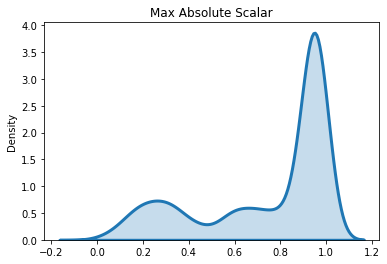

In [24]:
np.random.seed(42)

X = np.hstack((c1,c2,c3,c4))
y = np.dot(X , approx_coefs) + noise 
S = pre.MaxAbsScaler()
X_new = S.fit_transform(X)

sns.distplot(X_new, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},)
plt.title('Max Absolute Scalar')
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.4, random_state=42)

Model = LinearRegression()
Model.fit(X_train,y_train)

print('Model Coefs: ',Model.coef_)
print('Real Coefs: ',approx_coefs.reshape(1,-1))
print('------------')
y_pred = Model.predict(X_test)
print('MAE: ',metrics.mean_absolute_error(y_test,y_pred))
print('MAPE: ',metrics.mean_absolute_percentage_error(y_test,y_pred))
print('R2: ',metrics.r2_score(y_test,y_pred))
print('MSE: ',metrics.mean_squared_error(y_test,y_pred))


Model Coefs:  [[  4976.7208497  -21728.39604756   8759.45227526   5847.59570866]]
Real Coefs:  [[  0.43 -47.4   13.    -1.2 ]]
------------
MAE:  34.46892000817312
MAPE:  0.07895930948523104
R2:  0.9988662045839715
MSE:  2618.1609635591926


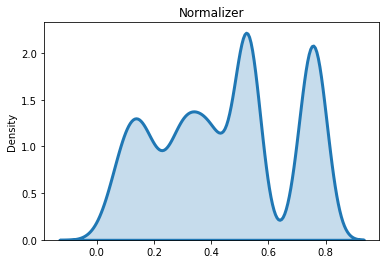

In [25]:
np.random.seed(42)

X = np.hstack((c1,c2,c3,c4))
y = np.dot(X , approx_coefs) + noise
S = pre.Normalizer()
X_new = S.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.4, random_state=42)
sns.distplot(X_new, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},)
plt.title('Normalizer')
Model = LinearRegression()
Model.fit(X_train,y_train)

print('Model Coefs: ',Model.coef_)
print('Real Coefs: ',approx_coefs.reshape(1,-1))
print('------------')
y_pred = Model.predict(X_test)
print('MAE: ',metrics.mean_absolute_error(y_test,y_pred))
print('MAPE: ',metrics.mean_absolute_percentage_error(y_test,y_pred))
print('R2: ',metrics.r2_score(y_test,y_pred))
print('MSE: ',metrics.mean_squared_error(y_test,y_pred))


Model Coefs:  [[  -31.09427252 -1656.48545995   352.5502548    -11.61677975]]
Real Coefs:  [[  0.43 -47.4   13.    -1.2 ]]
------------
MAE:  202.89555144088925
MAPE:  0.2959136779523404
R2:  0.9598211405626139
MSE:  92781.0430807483


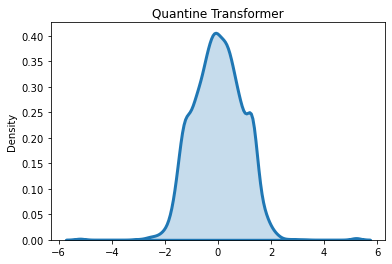

In [26]:
np.random.seed(42)

X = np.hstack((c1,c2,c3,c4,))
y = np.dot(X , approx_coefs) + noise

S = pre.QuantileTransformer(n_quantiles = 10, output_distribution='normal', random_state=42)
X_new = S.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.4, random_state=42)
sns.distplot(X_new, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},)
plt.title('Quantine Transformer')
Model = LinearRegression()
Model.fit(X_train,y_train)

print('Model Coefs: ',Model.coef_)
print('Real Coefs: ',approx_coefs.reshape(1,-1))
print('------------')
y_pred = Model.predict(X_test)
print('MAE: ',metrics.mean_absolute_error(y_test,y_pred))
print('MAPE: ',metrics.mean_absolute_percentage_error(y_test,y_pred))
print('R2: ',metrics.r2_score(y_test,y_pred))
print('MSE: ',metrics.mean_squared_error(y_test,y_pred))


We can conclude that outliers can heavily affect the performance of liner regression, especially in higher magnitudes. The importance of proportion is less than magnitude but combining them will heavily damage the accuracy of the model. They can also damage coefficients as they lower them to almost zero, and the mean and variance of them shows this effect. We can Also understand that using scalers can gives every feature same effect on our data and may result in a better outcome for our linear regression model.